In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

color='#4e6c50'

In [216]:
cols = ['Education',
        'Marital_Status',
        'AcceptedCmp1',
        'AcceptedCmp2',
        'AcceptedCmp3',
        'AcceptedCmp4',
        'AcceptedCmp5',
        'Complain',
        'Response']

data = pd.read_csv('data/marketing_campaign.csv', sep='\t', usecols=cols)

print(data.shape)
data.head()

(2240, 9)


,Education,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,Graduation,Single,0,0,0,0,0,0,1
1,Graduation,Single,0,0,0,0,0,0,0
2,Graduation,Together,0,0,0,0,0,0,0
3,Graduation,Together,0,0,0,0,0,0,0
4,PhD,Married,0,0,0,0,0,0,0


In [217]:
data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [218]:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

# Cleaning

In [219]:
# Cleaning weird marital status
data.Marital_Status.where(
    data.Marital_Status.isin(
        ['Married','Together','Single','Divorced','Widow']
    ),
    'Other',inplace=True
)

# Merging "Accepted campaign" cols
accepted_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
data['AcceptedCmp'] = data[accepted_cols].any(axis=1).astype(int)

data.drop(accepted_cols, axis=1, inplace=True)

print(data.shape)
data.head()

(2240, 5)


,Education,Marital_Status,Complain,Response,AcceptedCmp
0,Graduation,Single,0,1,0
1,Graduation,Single,0,0,0
2,Graduation,Together,0,0,0
3,Graduation,Together,0,0,0
4,PhD,Married,0,0,0


# Multiple correspondence analysis

In [220]:
import prince

mca = prince.MCA()
mca = mca.fit(data)
data_mca = mca.transform(data)
data_mca

,0,1
0,0.345741,-0.541503
1,0.613451,-0.474821
2,-0.086501,0.692170
3,-0.086501,0.692170
4,-0.185904,-0.635026
...,...,...
2235,0.014906,-0.115820
2236,-0.243873,0.032927
2237,-0.521189,-0.320341
2238,-0.288117,1.311053


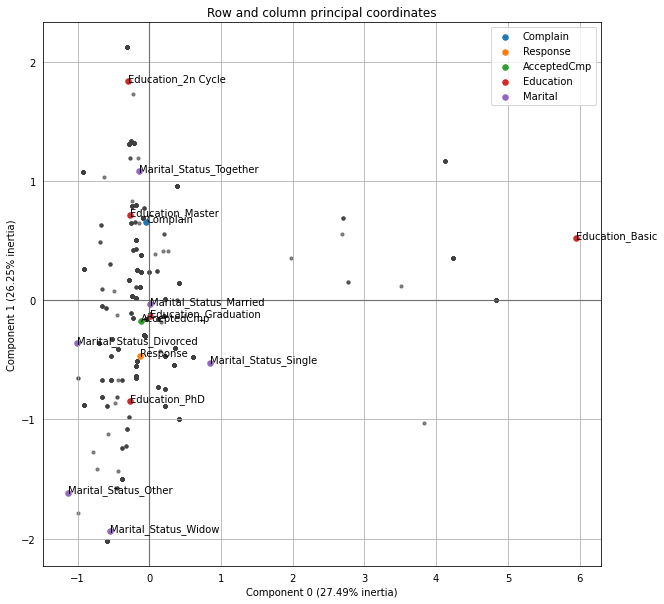

In [221]:
# Plotting rows and columns
ax = mca.plot_coordinates(
     X=data,
     figsize=(10, 10),
     show_column_labels=True,
     legend_n_cols=1
     )

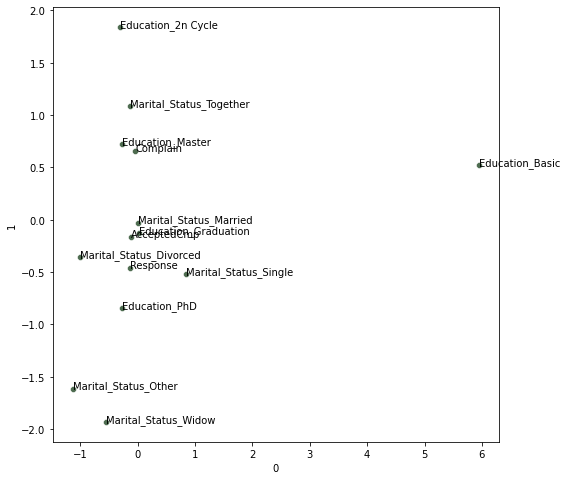

In [222]:
# Plotting columns only
import seaborn as sns

col_coordinates = (
    mca.column_coordinates(data).
    reset_index(level=0).
    rename(columns={0:'0', 1: '1'})
)

plt.figure(figsize=(8,8))
sns.scatterplot(data=col_coordinates,
                x='0',
                y='1',
                color=color
               )

for i in range(col_coordinates.shape[0]):
    plt.text(
        x=col_coordinates['0'][i],
        y=col_coordinates['1'][i],
        s=col_coordinates['index'][i]
    )

plt.show()